In [1]:
from IPython.display import display, HTML

display(HTML('<style>.output_scroll { height: 400px; overflow-y: scroll; }</style>'))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings("ignore")

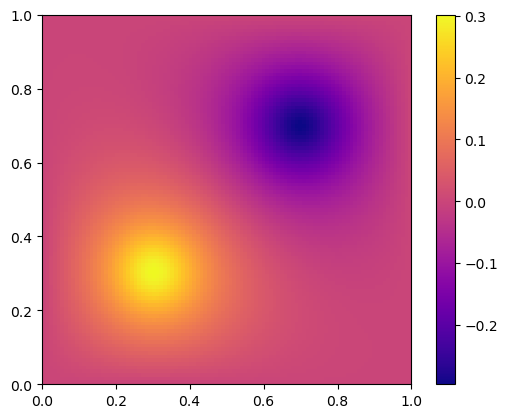

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

xmin,ymin=0,0 
xmax,ymax=1,1
N=100

def g2D(x,y,qx,qy,sigma=0.05): #mix,miy thesi fortiou
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e) )/ (2 * np.pi * sigma**2)

def convE(Etol=10**-6,N=100,w=1.75,max_iter=5000): #βελτιστες παραμετροι Ν=100,Ετολ=10^-10
                                                   #μαχ_ιτερ=5000,ω=1.2-1.4
    sfalma=1
    ite=0
    xmin,ymin=0,0 
    xmax,ymax=1,1
    Eideal=-9/14
    Etmp=0
    h=(xmax-xmin)/(N-1)
    E=0 #αρχική τιμή ενέργειας
    sfalma=1
    x=np.linspace(xmin,xmax,N+1) # η range λειτουργει μονο με ακεραιες τιμες
    y=np.linspace(ymin,ymax,N+1)  #bazw N anti gia N+1 giati exw orisei xwrista tis times sta akra
    pfilist=np.zeros((N+1,N+1))
    X,Y=np.meshgrid(x,y)
    
    G1 = g2D(X, Y, 0.3, 0.3)
    G2 = g2D(X, Y, 0.7, 0.7)
    S = G1 - G2
    
    pfilist[0,:]=0
    pfilist[N,:]=0
    pfilist[:,0]=0
    pfilist[:,N]=0
    
    while sfalma>Etol and ite<max_iter:
        ite+=1        
        for i in range(1,N):  #N-1 eixa prin
            for j in range(1,N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[i + 1, j] + pfilist[i - 1, j] +
                    pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                )

        E1=np.sum((pfilist[1:,:]-pfilist[:-1,:])**2)
        E2=np.sum((pfilist[:,1:]-pfilist[:,:-1])**2)        
        Etmp=0.5*(E1+E2)-h**2*np.sum(S*pfilist)

        sfalma=np.abs(Etmp-E)
        E=Etmp #Etmp einai ayto pou apothikevw prosorina gia tin sugkrisi

    return (pfilist, E, ite)

diagdata=convE()
plt.imshow(diagdata[0].T,cmap='plasma', origin = 'lower', extent = [0, 1, 0, 1])
plt.colorbar()
plt.show()



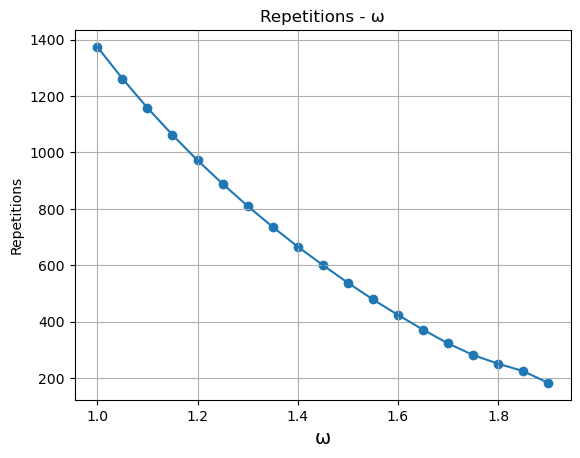

In [59]:
#now i wanna try different omegas and see convergence (iterations)

wlist=[]
iterlist=[]
energylist=[]
#af=apotelesma function

for w1 in np.arange(1.00, 1.95, 0.05):  # Δημιουργία τιμών από 1.0 έως 2.0
    af = convE(w=w1)  # Κλήση της συνάρτησης synartisi
    wlist.append(w1)  # Προσθήκη του omega στη λίστα
    iterlist.append(af[2])  # Προσθήκη του πρώτου αποτελέσματος
    energylist.append(af[1]) 




plt.plot(wlist,iterlist)
plt.scatter(wlist,iterlist)
plt.xlabel("ω",size=14)
plt.ylabel("Repetitions")
plt.title("Repetitions - ω")
plt.grid()
plt.show()
#anamenomeni sumperifora sto omega=2
#prepei na to kanw kai gia mikroteres times tou omega!!!
#to kanw sto telos giati tha parei pollh wra na treksei

In [7]:
'''Keep the size of the rectangular cell fixed and increase the mesh size (e.g.,
𝑁𝑥 = 𝑁𝑦 = 10, 100, 1000, etc. How does this affect the calculated energy
[see Eq. (7)].'''

'Keep the size of the rectangular cell fixed and increase the mesh size (e.g.,\n𝑁𝑥 = 𝑁𝑦 = 10, 100, 1000, etc. How does this affect the calculated energy\n[see Eq. (7)].'

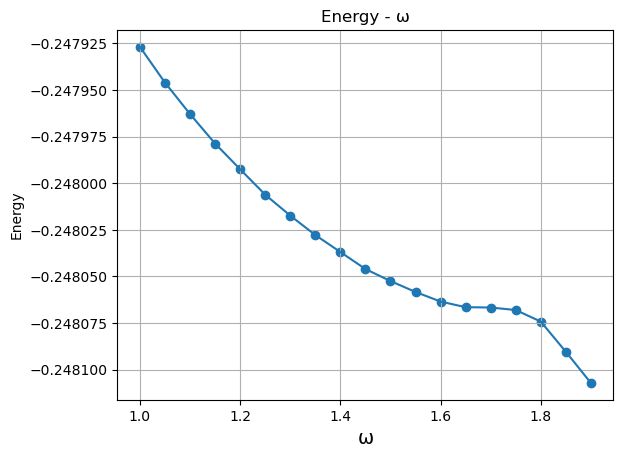

In [60]:
#energy-omega


plt.plot(wlist,energylist)
plt.scatter(wlist,energylist)
plt.xlabel("ω",size=14)
plt.ylabel("Energy")
plt.title("Energy - ω")
plt.grid()
plt.show()

In [9]:
print(energylist) 

[-0.40084032941828474, -0.40085946039966314, -0.4008771010716188, -0.4008925253415937, -0.4009067850998298, -0.40091877685388083, -0.400930226913526, -0.40094075151022623, -0.40095083771118123, -0.4009588803170834, -0.400966111443226, -0.4009716358124696, -0.4009763131822753, -0.4009787519229397, -0.40097916020417534, -0.4009807133605754, -0.40098760359915697, -0.4010042437015763, -0.4010214850365662]


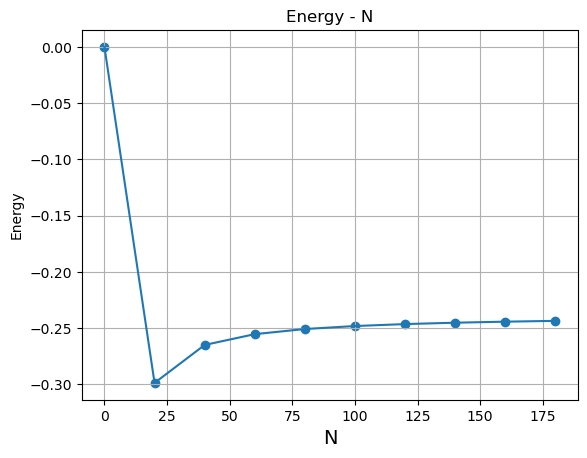

In [54]:
Nlist=[]
energylist=[]
#af=apotelesma function

for n in np.arange(0, 200, 20):  # Δημιουργία τιμών από 1.0 έως 2.0
    af = convE(N=n)  # Κλήση της συνάρτησης synartisi
    Nlist.append(n)  # Προσθήκη του omega στη λίστα
    energylist.append(af[1]) 




plt.plot(Nlist,energylist)
plt.scatter(Nlist,energylist)
plt.xlabel("N",size=14)
plt.ylabel("Energy")
plt.title("Energy - N")
plt.grid()
plt.show()

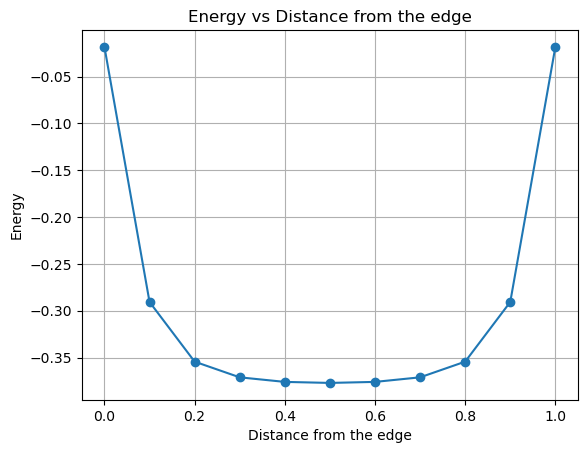

In [11]:
xmin,ymin=0,0 
xmax,ymax=1,1
N=100

def g2D(x,y,qx,qy,sigma=0.02): #mix,miy thesi fortiou
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e) )/ (2 * np.pi * sigma**2)

def convE2(Etol=10**-6,N=100,w=1.75,max_iter=5000): #βελτιστες παραμετροι Ν=100,Ετολ=10^-10
                                                   #μαχ_ιτερ=5000,ω=1.2-1.4
    sfalma=1
    E=1 
    ite=0
    xmin,ymin=0,0 
    xmax,ymax=1,1
    Eideal=-9/14
    Etmp=0
    h=(xmax-xmin)/(N-1)
    E=0 #αρχική τιμή ενέργειας
    sfalma=1
    x=np.linspace(xmin,xmax,N+1) # η range λειτουργει μονο με ακεραιες τιμες
    y=np.linspace(ymin,ymax,N+1)  #bazw N anti gia N+1 giati exw orisei xwrista tis times sta akra
    X,Y=np.meshgrid(x,y)
    Elista=[]    

    x_thesi=np.arange(0,1.1,0.1)
    for i in x_thesi:
        pfilist = np.zeros((N+1, N+1))  # Reset το δυναμικό για κάθε νέα θέση φορτίου CHAT GPT!

        G1 = g2D(X, Y, i, 0.2)
        G2 = g2D(X, Y, i, 0.6)
        S = G1 - G2
        
        pfilist[0,:]=0
        pfilist[N,:]=0
        pfilist[:,0]=0
        pfilist[:,N]=0
        
        sfalma = 1 #CHAT
        E = 0 #CHAT
        ite = 0 #CHAT
        
        while sfalma>Etol and ite<max_iter:
            ite+=1        
            for i in range(1,N):  #N-1 eixa prin
                for j in range(1,N):
                    pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                        pfilist[i + 1, j] + pfilist[i - 1, j] +
                        pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                    )
    
            E1=np.sum((pfilist[1:,:]-pfilist[:-1,:])**2)
            E2=np.sum((pfilist[:,1:]-pfilist[:,:-1])**2)        
            Etmp=0.5*(E1+E2)-h**2*np.sum(S*pfilist)
    
            sfalma=np.abs(Etmp-E)
            E=Etmp #Etmp einai ayto pou apothikevw prosorina gia tin sugkrisi
        Elista.append(E)

    return (pfilist, E, Elista,x_thesi)

datamou=convE2()

plt.plot(datamou[3], datamou[2], marker='o')
plt.xlabel("Distance from the edge")
plt.ylabel("Energy")
plt.title("Energy vs Distance from the edge")
plt.grid()
plt.show() # δεν ειμαι καθολου σιγουρη αν τα νουμερα για την ενεργεια ειναι τα αναμενομενα

In [12]:
'''Create a Faraday cage in the cell. Is the calculated potential physically
meaningful?'''

'Create a Faraday cage in the cell. Is the calculated potential physically\nmeaningful?'

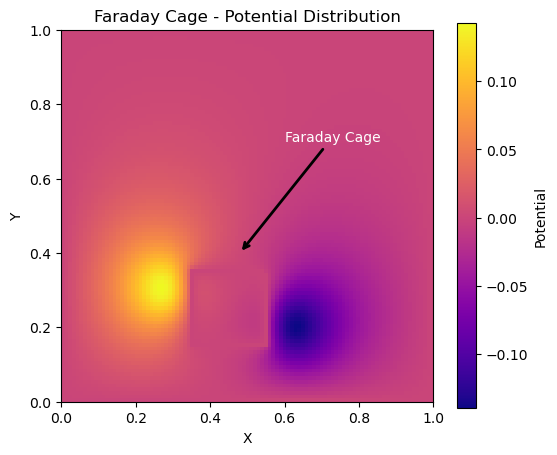

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def FaradayCage(Etol=10**-6, N=100, w=1.75, max_iter=5000):
    auxMat = np.ones((N+1, N+1))  # Τώρα είναι 2D
    auxMat[0, :] = 0
    auxMat[N, :] = 0
    auxMat[:, 0] = 0
    auxMat[:, N] = 0

    sfalma = 1
    ite = 0
    xmin, ymin = 0, 0
    xmax, ymax = 1, 1
    h = (xmax - xmin) / (N - 1)
    E = 0  # Αρχική τιμή ενέργειας
    x = np.linspace(xmin, xmax, N+1)
    y = np.linspace(ymin, ymax, N+1)
    X, Y = np.meshgrid(x, y)

    # Φορτίο Διπόλου
    G1 = g2D(X, Y, 0.3, 0.3)
    G2 = g2D(X, Y, 0.2, 0.6)
    S = G1 - G2

    # Ορισμός συνόρων (κλουβί Faraday)
    pfilist = np.zeros((N+1, N+1))
# Καθορισμός των ορίων του κλουβιού Faraday
    pfilist[30:41, 20] = 0  # Κάθετο τοίχωμα αριστερά
    pfilist[30:41, 80] = 0  # Κάθετο τοίχωμα δεξιά
    pfilist[30, 20:80] = 0  # Οριζόντιο τοίχωμα πάνω
    pfilist[40, 20:80] = 0 
    # Οριζόντιο τοίχωμα κάτω
    auxMat[35:55, 15] = 0
    auxMat[35:55, 35] = 0
    auxMat[35, 15:35] = 0
    auxMat[55, 15:35] = 0


    
    while sfalma > Etol and ite < max_iter:
        ite += 1
                
        for i in range(1, N):  
            for j in range(1, N):
                if auxMat[i, j] != 0:  # Διορθωμένη συνθήκη
                    pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                        pfilist[i + 1, j] + pfilist[i - 1, j] +
                        pfilist[i, j + 1] + pfilist[i, j - 1] + h ** 2 * S[i, j]
                    )

        # Υπολογισμός ενέργειας
        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)
        Etmp = 0.5 * (E1 + E2) - h**2 * np.sum(S * pfilist)

        sfalma = np.abs(E - Etmp)
        E = Etmp

    return pfilist, E, ite


# Εκτελείς τη FaradayCage()
faraday_data = FaradayCage()
potential_grid = faraday_data[0]

# Σχεδίαση του imshow διαγράμματος
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(potential_grid.T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar(im, label="Potential")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Faraday Cage - Potential Distribution")

cage_x, cage_y = 0.48, 0.4  # Τοποθεσία του κλουβιού Faraday

ax.annotate("Faraday Cage",  
            xy=(cage_x, cage_y),  # Σημείο που θα δείχνει το βέλος
            xytext=(0.6, 0.7),  # Σημείο που θα εμφανίζεται η ετικέτα
            arrowprops=dict(facecolor='white', edgecolor='black', arrowstyle='->', linewidth=2),
            fontsize=10, color='white')
plt.show()


'''can you create a capacitor?''' Στον αρχικο μου κωδικα αντι για δυο σημειακα φορτια (διπολο) θα εχω δυο παραλληλες πλακες αντιθετου δυναμικου

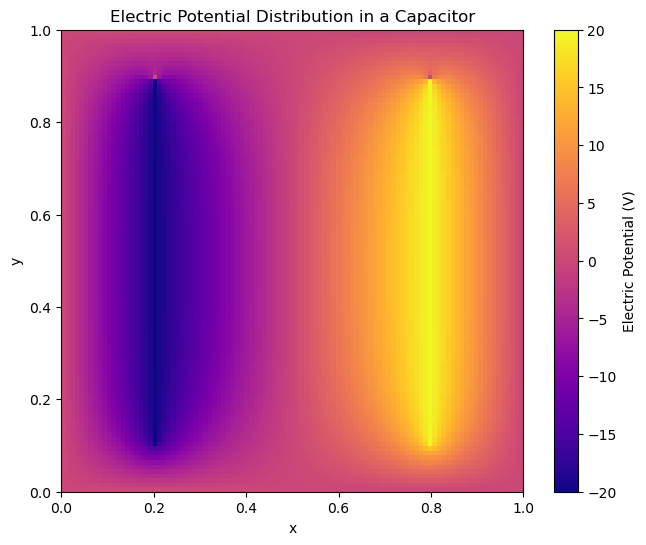

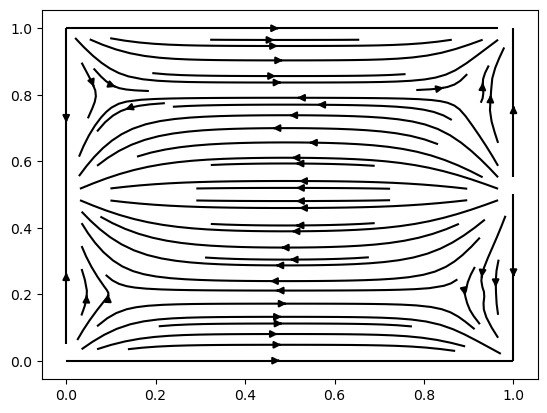

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Ορισμός του πλέγματος και του χώρου
xmin, ymin = 0, 0
xmax, ymax = 1, 1
N = 100  # Πλέγμα 100x100
h = (xmax - xmin) / (N - 1)  # Βήμα του πλέγματος


def convE_capacitor(Etol=1e-6, N=100, w=1.75, max_iter=5000):
    ite = 0
    h = (xmax - xmin) / (N - 1)  # Βήμα του πλέγματος
    sfalma = 1  # Αρχικό σφάλμα (για την σύγκλιση)
    E = 0  # Αρχική ενέργεια

    # Ορισμός του πλέγματος
    x = np.linspace(xmin, xmax, N+1)
    y = np.linspace(ymin, ymax, N+1)
    pfilist = np.zeros((N+1, N+1))  # Πίνακας ηλεκτρικού δυναμικού

    ################################################################################
    V0 = 20  # Τάση μεταξύ των πλακών
    plate_width = int(N * 0.8)  # Το πλάτος των πλακών είναι το 80% του πλέγματος

    # Καθορισμός θέσης των πλακών
    top_plate_y = int(0.8 * N)  # Άνω πλάκα στη γραμμή 80 (για Ν=100)
    bottom_plate_y = int(0.2 * N)  # Κάτω πλάκα στη γραμμή 20 (για Ν=100)
    
    # Τοποθέτηση των πλακών στο πλέγμα με σταθερό δυναμικό
    start_x = (N - plate_width) // 2  # Αρχή πλάκας - // ακεραια διαιρεση
    end_x = (N + plate_width) // 2  # Τέλος πλάκας
    
    # Άνω πλάκα (+V0)
    pfilist[top_plate_y, start_x:end_x] = V0
    
    # Κάτω πλάκα (-V0)
    pfilist[bottom_plate_y, start_x:end_x] = -V0
    ##############################################################################
    
    while sfalma > Etol and ite < max_iter:
        ite += 1

        for i in range(1, N):
            for j in range(1, N):
                # Εξαιρούμε τα σημεία των πλακών
                if not ((int(0.8*N) == i and (N - plate_width) // 2 <= j <= (N + plate_width) // 2) or
                        (int(0.2*N) == i and (N - plate_width) // 2 <= j <= (N + plate_width) // 2)):
                    pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                        pfilist[i+1, j] + pfilist[i-1, j] +
                        pfilist[i, j+1] + pfilist[i, j-1]
                    )
        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :]) ** 2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1]) ** 2)
        Etmp = 0.5 * (E1 + E2)

        sfalma = np.abs(Etmp - E)
        E = Etmp  # Αποθήκευση της νέας τιμής ενέργειας

    return pfilist, E, ite

potential, energy, iterations = convE_capacitor()

plt.figure(figsize=(8, 6))
plt.imshow(potential.T, cmap='plasma', origin='lower', extent=[xmin, xmax, ymin, ymax])
plt.colorbar(label="Electric Potential (V)")
plt.title("Electric Potential Distribution in a Capacitor")
plt.xlabel("x")
plt.ylabel("y")
plt.show() #as sxediasw kai to hlektrko pedio 

Ex, Ey = np.gradient(-potential, h)
plt.streamplot(np.linspace(0, 1, N+1), np.linspace(0, 1, N+1), Ex, Ey, color='black')




• Implement Neumann and Periodic Boundary conditions. 


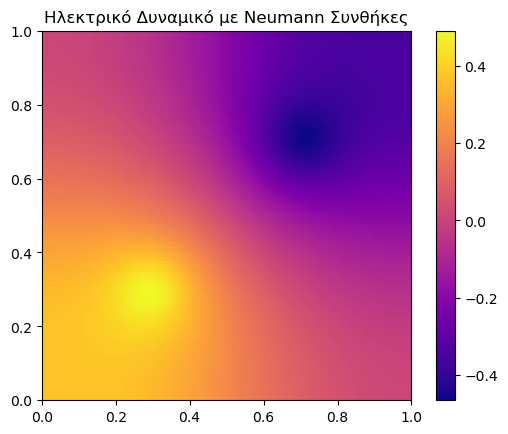

In [111]:
import numpy as np
import matplotlib.pyplot as plt

xmin, ymin = 0, 0
xmax, ymax = 1, 1
N = 100  # Μέγεθος πλέγματος

def g2D(x, y, qx, qy, sigma=0.05):
    """ Δημιουργεί μια Gaussian κατανομή φορτίου. """
    e = (-((x - qx)**2 + (y - qy)**2)) / (2 * sigma**2)
    return (np.exp(e)) / (2 * np.pi * sigma**2)

def convE_Neumann(Etol=1e-6, N=100, w=1.75, max_iter=5000):
    """ Επιλύει την εξίσωση Poisson με Neumann οριακές συνθήκες. """
    sfalma = 1
    ite = 0
    h = (xmax - xmin) / (N - 1)
    E = 0  # Αρχική τιμή ενέργειας

    x = np.linspace(xmin, xmax, N+1)
    y = np.linspace(ymin, ymax, N+1)
    pfilist = np.zeros((N+1, N+1))
    X, Y = np.meshgrid(x, y)

    G1 = g2D(X, Y, 0.3, 0.3)
    G2 = g2D(X, Y, 0.7, 0.7)
    S = G1 - G2  # Συνάρτηση πηγής

    while sfalma > Etol and ite < max_iter:
        ite += 1        
        for i in range(1, N):  
            for j in range(1, N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[i+1, j] + pfilist[i-1, j] +
                    pfilist[i, j+1] + pfilist[i, j-1] + h**2 * S[i, j]
                )

        # ** Neumann Boundary Conditions (κάθε επανάληψη) **
        pfilist[0, :] = pfilist[1, :]   # Κάτω όριο
        pfilist[N, :] = pfilist[N-1, :] # Πάνω όριο
        pfilist[:, 0] = pfilist[:, 1]   # Αριστερό όριο
        pfilist[:, N] = pfilist[:, N-1] # Δεξί όριο

        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)        
        Etmp = 0.5 * (E1 + E2) - h**2 * np.sum(S * pfilist)

        sfalma = np.abs(Etmp - E)
        E = Etmp  # Αποθήκευση της νέας τιμής ενέργειας

    return pfilist, E, ite

# ** Εκτέλεση της επίλυσης **
diagdata = convE_Neumann()

# ** Οπτικοποίηση του δυναμικού **
plt.imshow(diagdata[0].T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.title("Ηλεκτρικό Δυναμικό με Neumann Συνθήκες")
plt.show()


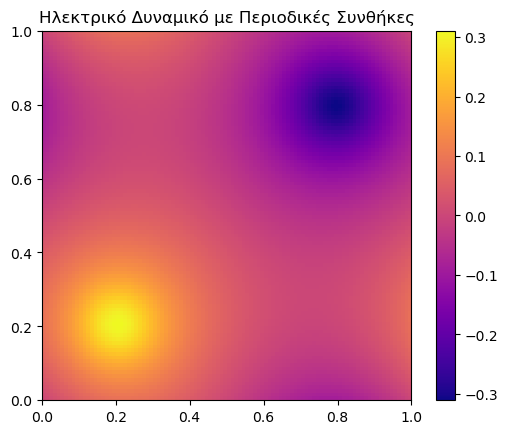

In [134]:
import numpy as np
import matplotlib.pyplot as plt

xmin, ymin = 0, 0
xmax, ymax = 1, 1
N = 100  # Μέγεθος πλέγματος

def per(i, N):
    if i < 0:
        return i + N
    elif i >= N:
        return i - N
    else:
        return i

def convE_periodic(Etol=1e-6, N=100, w=1.75, max_iter=10000):
    ite = 0
    h = (xmax - xmin) / (N - 1)
    E = 0  # Αρχική τιμή ενέργειας
    sfalma = 1

    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    pfilist = np.zeros((N, N))
    X, Y = np.meshgrid(x, y)

    G1 = g2D(X, Y, 0.2, 0.2)
    G2 = g2D(X, Y, 0.8, 0.8)
    S = G1 - G2  # Συνάρτηση πηγής

    # ** Επαναληπτική διαδικασία Successive Over-Relaxation (SOR) **
    while sfalma > Etol and ite < max_iter:
        ite += 1        
        for i in range(N):  
            for j in range(N):
                pfilist[i, j] = (1 - w) * pfilist[i, j] + (w / 4) * (
                    pfilist[per(i + 1, N), j] + pfilist[per(i - 1, N), j] +
                    pfilist[i, per(j + 1, N)] + pfilist[i, per(j - 1, N)] + h ** 2 * S[i, j]
                )

        # Υπολογισμός ενέργειας
        E1 = np.sum((pfilist[1:, :] - pfilist[:-1, :])**2)
        E2 = np.sum((pfilist[:, 1:] - pfilist[:, :-1])**2)        
        Etmp = 0.5 * (E1 + E2) - h**2 * np.sum(S * pfilist)

        sfalma = np.abs(Etmp - E)
        E = Etmp  # Αποθήκευση της νέας τιμής ενέργειας

    return pfilist, E, ite
diagdataper = convE_periodic()

# ** Οπτικοποίηση του δυναμικού **
plt.imshow(diagdataper[0].T, cmap='plasma', origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.title("Ηλεκτρικό Δυναμικό με Περιοδικές Συνθήκες")
plt.show()
